##ASSIGNMENT 1: INTRO TO ML

Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import geopandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm

Reading the data

In [6]:
 # reading two csv files
data1 = pd.read_csv('articleInfo.csv')
data2 = pd.read_csv('authorInfo.csv')

#fill all NaN with 0
data1 = data1.replace(np.nan,0)
data2 = data2.replace(np.nan,0)

#merge the files together
output = pd.merge(data1, data2,  on='Article No.',  how='inner')

#sort output by year
output = output.sort_values('Year')
output

,Article No.,Title,Year,Author Number,Key Words,Citation,Source,Abstract,Type,Author Name,Author Affiliation,Country,h-index
370,79,The Effectiveness of Virtual and Augmented Rea...,2017,4.0,"gross anatomy education, health sciences educa...",662.0,ANATOMICAL SCIENCES EDUCATION,Although cadavers constitute the gold standard...,Journal,Christos Kyrlitsias,Cyprus University of Technology,Cyprus,5.0
371,79,The Effectiveness of Virtual and Augmented Rea...,2017,4.0,"gross anatomy education, health sciences educa...",662.0,ANATOMICAL SCIENCES EDUCATION,Although cadavers constitute the gold standard...,Journal,Maria Christofi,Cyprus University of Technology,Cyprus,8.0
372,79,The Effectiveness of Virtual and Augmented Rea...,2017,4.0,"gross anatomy education, health sciences educa...",662.0,ANATOMICAL SCIENCES EDUCATION,Although cadavers constitute the gold standard...,Journal,Despina Michael-Grigoriou,Cyprus University of Technology,Cyprus,15.0
175,36,Spatial Learning and Wayfinding in an Immersiv...,2017,3.0,0,10.0,CYBERPSYCHOLOGY BEHAVIOR AND SOCIAL NETWORKING,Previous work has examined whether immersive t...,Journal,Simone Schnall,University of Cambridge,United Kingdom,0.0
176,36,Spatial Learning and Wayfinding in an Immersiv...,2017,3.0,0,10.0,CYBERPSYCHOLOGY BEHAVIOR AND SOCIAL NETWORKING,Previous work has examined whether immersive t...,Journal,Ruth Weaver,Plymouth University,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,56,Influence of Learning Engagement on Learning E...,2022,1.0,"virtual reality (VR), learning engagement, lea...",1.0,INTERNATIONAL JOURNAL OF EMERGING TECHNOLOGIES...,"In this study, the differences generated by th...",Journal,Lenitra M. Durham,Intel Corporation,United States of America,0.0
264,56,Influence of Learning Engagement on Learning E...,2022,1.0,"virtual reality (VR), learning engagement, lea...",1.0,INTERNATIONAL JOURNAL OF EMERGING TECHNOLOGIES...,"In this study, the differences generated by th...",Journal,Ramesh Manuvinakurike,Intel Corporation,United States of America,0.0
265,56,Influence of Learning Engagement on Learning E...,2022,1.0,"virtual reality (VR), learning engagement, lea...",1.0,INTERNATIONAL JOURNAL OF EMERGING TECHNOLOGIES...,"In this study, the differences generated by th...",Journal,Eda Okur,Intel Corporation,United States of America,0.0
251,53,IoT Networks and Digital Twin Technology-Based...,2022,2.0,0,0.0,SECURITY AND COMMUNICATION NETWORKS,In order to improve the effect of English clas...,Journal,Bernd Zinn,University of Stuttgart,Germany,14.0


Getting the data

In [45]:
articles_publication = data1.groupby('Year').count()
citation_count = data1.groupby('Year')['Citation'].sum()

#Question 1 Part 1
Plot the yearly_publication figure, in which the x-axis is the year, the y-axis is the number of articles published during that year.

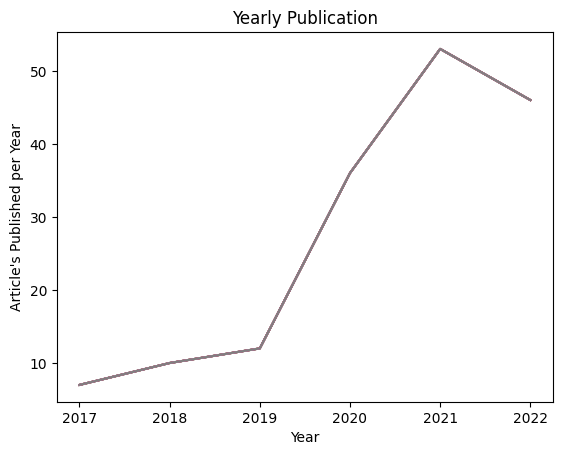

In [46]:
#part 1
plt.plot(articles_publication.index,articles_publication.values)
plt.title("Yearly Publication") # set the title of the figure
plt.xlabel("Year") # x-axis label
plt.ylabel("Article's Published per Year") # y-axis label
plt.show() # display the figure

#Question 1 Part 2
Plot the yearly_citation figure, in which the x-axis is the year, the y-axis is the total number of citations during that year.

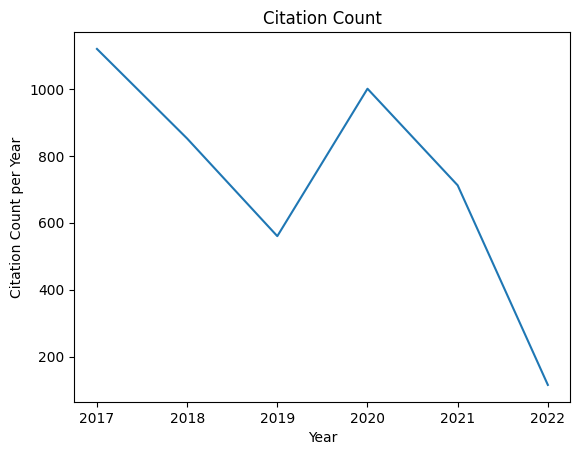

In [47]:
#part 2
plt.plot(citation_count.index, citation_count.values)
plt.title("Citation Count") # set the title of the figure
plt.xlabel("Year") # x-axis label
plt.ylabel("Citation Count per Year") # y-axis label
plt.show() # display the figure

#Question 1 Part 3
Plot the figure of the number of publications across countries. You may use any available python libraries, such as pygal_maps_world, geopandas, or others.

In [48]:
import geopandas as gpd

replace = {'Hong Kong': 'China',
           'Denmark ': 'Denmark',
           'Spain ': 'Spain',
           'Chian': 'China',
           'Korea': 'South Korea',
           'Liechtenstein': 'Switzerland',
           'Chile ': 'Chile',
           'Czech Republic': 'Czechia',
           'Denamrk': 'Denmark',
           'USA': 'United States of America',
           'Israel ': 'Israel',
           'Bristol': 'United Kingdom'}
country_count = data2.groupby('Country').count()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap = world.merge(country_count, left_on = 'name', right_on = 'Country')

worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Author Name,Author Affiliation,Article No.,h-index
0,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",12,12,12,12
1,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",62,62,62,62
2,1.895204e+07,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",9,9,9,9
3,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((180.00000 71.51571, 180.00000 ...",5,5,5,5
4,5.347896e+06,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",2,2,2,2
5,5.855827e+07,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",17,17,17,17
6,1.275755e+08,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",3,3,3,3
7,6.705989e+07,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",7,7,7,7
8,9.053300e+06,Asia,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",1,1,1,1
9,4.685306e+06,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",1,1,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

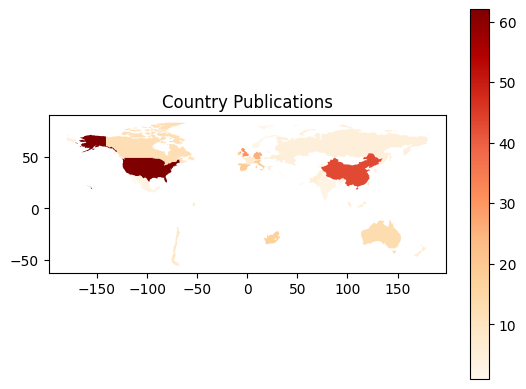

In [49]:
fig, ax = plt.subplots(1,1)
worldmap.plot(column = 'Article No.', ax= ax, cmap = 'OrRd', legend = True)
ax.set_title('Country Publications')
plt.show

#Question 1 Part 4
What are the top 5 institutions that have the most published articles in this area?

In [50]:
institutions = data2.groupby('Author Affiliation').count()
top_five = institutions.sort_values('Article No.', ascending= False)
#Top 5 index
top_five = top_five[0:5]
print(top_five[['h-index']])

                                h-index
Author Affiliation                     
University of the Western Cape       17
Masaryk University                   12
Intel Corporation                    11
University College Cork              11
Madigan Army Medical Center           8


#Question 1 Part 5
Who are the top 5 researchers that have the most h-index in this area?

In [51]:
data2['h-index'] = data2['h-index']
top_five_researchers = data2.sort_values('h-index', ascending= False)
top_five_researchers = top_five_researchers[0:5]
top_five_researchers[['Author Name', 'h-index']]

,Author Name,h-index
121,Ulrich Trautwein,95.0
108,Nicolas Molinari,63.0
16,George S. Athwal,59.0
183,Maria Luisa Lorusso,33.0
209,Vicente A. González,33.0


##Question 2

In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import geopandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm

#Question 2 Part 1

In [53]:
#PART 2
#read in data.csv
data = pd.read_csv('data.csv')
for column in data:
    smin = min(data[column])
    smax = max(data[column])
    data[column] = (data[column] - smin )/( smax - smin)
#data = data.fillna(0)
print(data.head(10)) 

y = data[['SUS']] # dependent variable
x = data[['ASR_Error', 'Intent_Error', 'Duration', 'Gender', 'Purchase']]
#x = data.drop(columns='SUS') # predictor variables
x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

model = sm.OLS(y_train,x_train)
results = model.fit()
prediction = results.predict(x_test.to_numpy())



#part 1
print(results.summary())
print('mean squared error:', mean_squared_error(prediction, y_test))
print('mean absolute percentage error:', mean_absolute_percentage_error(y_test, prediction))
#part 2 -5
print(results.params)

   Purchase       SUS  Duration  Gender  ASR_Error  Intent_Error  Unnamed: 6
0       1.0  0.758621  0.687324     0.0   0.214286      0.166667         NaN
1       0.0  0.310345  0.667606     0.0   0.428571      0.750000         NaN
2       0.0  0.275862  0.323944     1.0   0.428571      0.666667         NaN
3       0.0  0.258621  0.033803     0.0   0.785714      0.583333         NaN
4       1.0  0.948276  0.709859     0.0   0.142857      0.250000         NaN
5       0.0  0.534483  0.290141     1.0   0.571429      0.750000         NaN
6       0.0  0.620690  0.228169     1.0   0.428571      0.250000         NaN
7       0.0  0.413793  0.101408     0.0   0.428571      0.916667         NaN
8       0.0  0.275862  0.343662     0.0   0.642857      0.750000         NaN
9       0.0  0.965517  0.507042     0.0   0.785714      0.333333         NaN
                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0

#Question 2 Part 2
Based off the Results. ASR_Error and Intent_Error are the most significant because they have the highest P-values. They are also both negatively correlated meaing that as SUS increases, ASR_Error and Intent_Error decrease. When Siri fails to recgonize user speech and detect it, it only makes sense that SUS increases because of the lack of consistency. The insignificant parts are Gender, Purchase, and Duration because the P-value is less than .05. Therefore, there is a less an 5% chance that the result occured not randomly.

const           0.969355
ASR_Error      -0.233757
Intent_Error   -0.537017
Duration       -0.028028
Gender         -0.029180
Purchase        0.021873

#Question 2 Part 3 
I expected most of the results to be this way except for duration. I expected ASR-Error, Intent_Error, Purchase, Duration, and Gender.

I thought ASR_Error would be significant because it identified when Siri would not recognize user speech. The more times Siri failed the user speech recognition, the more the SUS scores would go down. Hence, a negative correlation which did happen.

I thought Intent_Error would be significant as well because it looks for how many times it failed to identify the user's act. If this has more errors then the user would give a lower score on SUS. Hence, a negative correlation which did happen.

I thought Purchase factor to be insignificant because whether or not someone purchases a ticket is not an indicator on how good Siri is. There can be many more uses of SIri which does not really highlight the impact of Siri. Hence, the P-value was less than 5%.

I thought Duration would be impactful but it was not. I thought it would be impactful because I thought the longer interaction the better opionion of the customer on Siri. It did infact not prove significant to the SUS Score.

I thought gender would be insignificant because it does not really impact how technology works. I was right and it did not impact the performance of Siri.

#Question 2 Part 4
Both ASR_Error and Intent_Error are both really significant towards getting the result. But the MOST influential factor on SUS is Intent_Error because it has a high coefficient of -.5191 and a P-value of 0. That means that there is basically a 100% certaintity that Intent_error is impactful in determining the score of SUS

#Question 2 Part 5
Intent_Error and ASR_Error are significant predictors for SUS because they involve interaction with Siri. Impacting the system's usability will cause significant changes to purchase tickets. They also could occur in any usecase of Siri besides purchasing which could be reasons for the high SUS singificant rate

##Question 3

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import geopandas
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from imblearn.over_sampling import SMOTE

C:\Users\Alan Wang\AppData\Local\Temp\ipykernel_38228\1423498319.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['Purchase'], palette='bright')


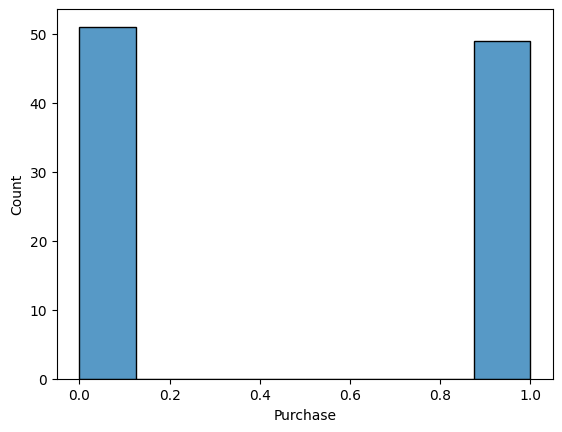

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

In [55]:
#PART 1
    
# reading two csv files
data = pd.read_csv('data.csv')   

#seeing the data visually
sns.histplot(data=data['Purchase'], palette='bright')
plt.show()

data = data.drop('Unnamed: 6', axis = 1)
data.head()
data.isna().sum()

In [56]:

#logistic regression
y = data["Purchase"].to_numpy()
y
x = data[["ASR_Error", "Intent_Error", "Duration", "Gender"]]
x

,ASR_Error,Intent_Error,Duration,Gender
0,3,2,254,0
1,6,9,247,0
2,6,8,125,1
3,11,7,22,0
4,2,3,262,0
...,...,...,...,...
95,13,7,358,0
96,3,0,71,0
97,0,9,34,1
98,4,1,49,1


              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.81      0.87        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.81      0.90        16

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.81      0.87        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

              preci

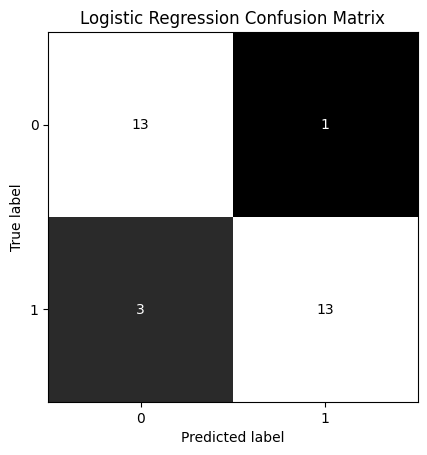

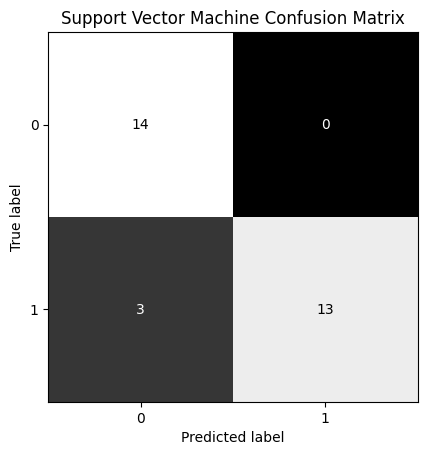

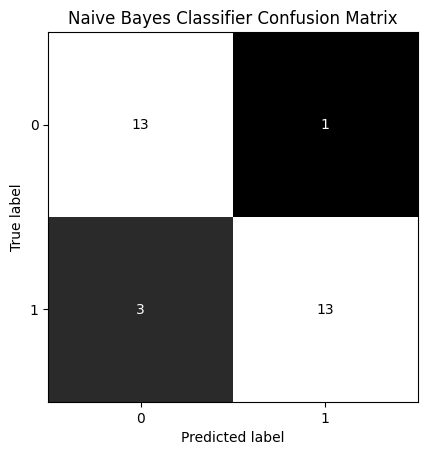

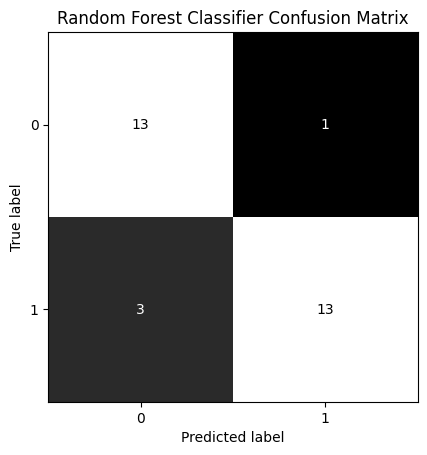

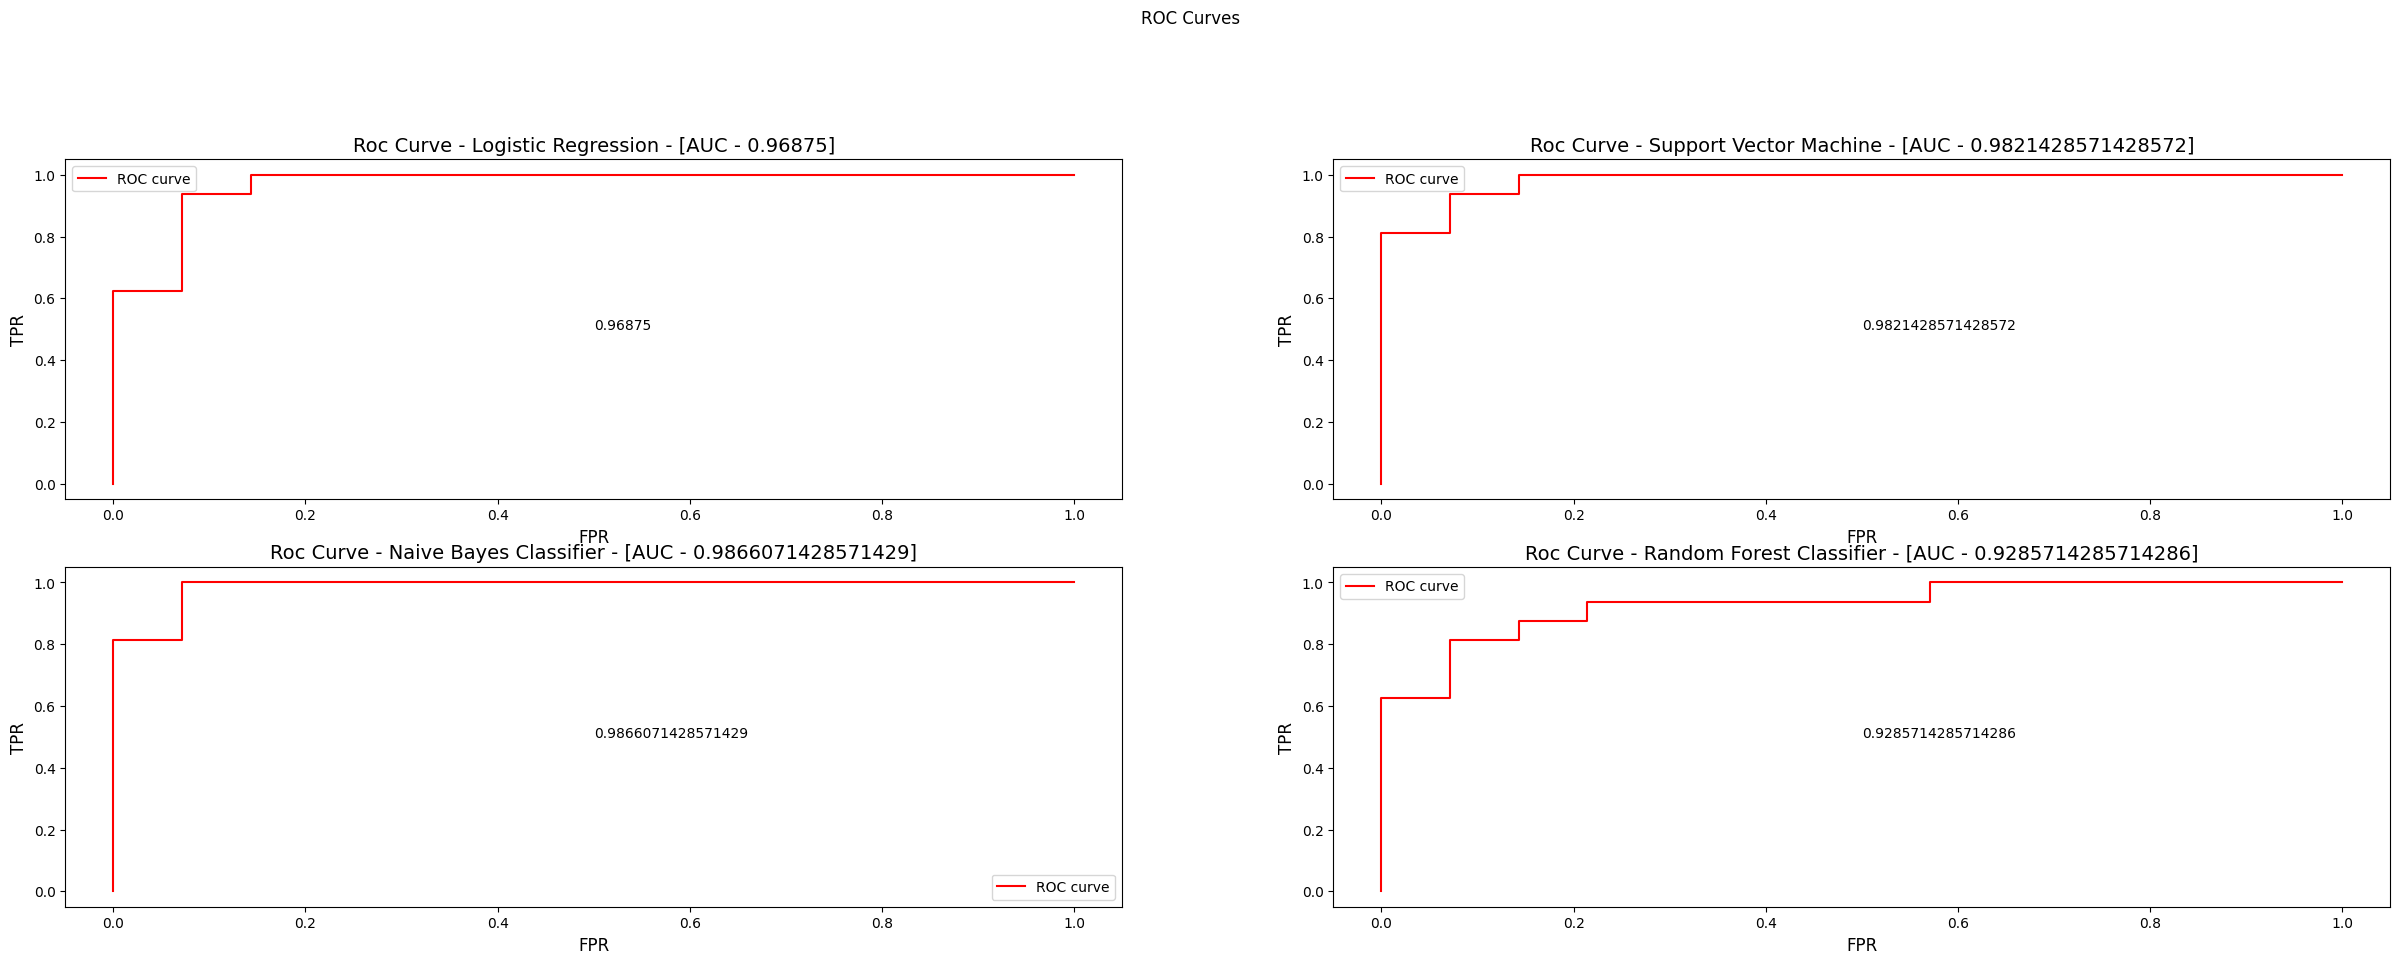

In [61]:
#scale factors
scale = StandardScaler()
scaled_X = scale.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

#set values functions
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

#using data to fit the models
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

#form categorization of each dataset 
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

#print the model evalution report
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

#model, predication, pred_probabilities array functions
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]


plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.text(.5,.5,auc(fpr, tpr))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()